In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

2024-05-09 15:02:21.989586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 15:02:21.989719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 15:02:22.141142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Uploading dataset file ( only for google colab )

In [2]:
# from google.colab import files
# files.upload()

reading the dataset using pandas library

In [3]:
data = pd.read_csv('/kaggle/input/boston-house-prices/boston.csv')

setting the 'CRIM' Column as x, and 'MEDV' for y

In [4]:
x = data['CRIM']
x

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [5]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

using 70% of our data for training and 0.3 for test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

building the regression model

In [8]:
i = Input(shape=(1,))
x = Dense(1)(i)
model = Model(i, x)

In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mse')

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 594.9717 - val_loss: 403.0403
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 490.1930 - val_loss: 305.1392
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 351.6130 - val_loss: 269.4171
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 230.6724 - val_loss: 250.7891
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.0147 - val_loss: 138.3774
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.2840 - val_loss: 141.7390
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.8227 - val_loss: 110.4806
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.9376 - val_loss: 111.8386
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.1807 - val_loss: 6211.1133
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2385.7200 - val_loss: 102.6678
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93.2211 - val_loss: 102.0076
Epoch 12/100
12/12

importing matplotlib for visualization

In [11]:
import matplotlib.pyplot as plt

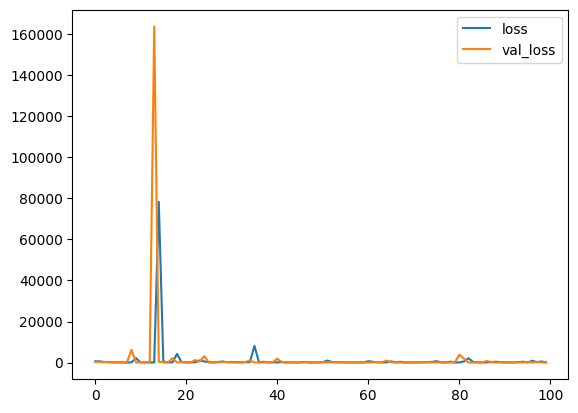

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()